### Step 1: Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
sns.set_theme(rc={'figure.figsize':(7.7,4.27)})
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay,f1_score,recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings 
warnings.filterwarnings("ignore")

### Step 2: Loading and Inspecting the Dataset

In [3]:
data=pd.read_csv("Dataset/Data.csv")

In [4]:
data

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,7.000,7.455,7.727,12,128.72872,6,1,31.248,31.248,'Very Low'
1,3.600,4.800,5.800,12,128.72872,6,1,31.248,31.248,'Very Low'
2,3.455,4.909,5.818,12,128.72872,6,1,31.248,31.248,'Very Low'
3,4.455,5.273,5.909,12,128.72872,6,1,31.248,31.248,'Very Low'
4,3.500,5.100,5.900,12,128.72872,6,1,31.248,31.248,'Very Low'
...,...,...,...,...,...,...,...,...,...,...
25692,2.563,1.765,0.423,4,732.95900,4,3,181.616,1.025,'Very Low'
25693,3.456,2.438,1.037,4,732.95900,4,3,181.616,1.025,'Very Low'
25694,4.290,3.048,1.026,4,732.95900,4,3,181.616,1.025,'Very Low'
25695,4.483,3.804,1.734,4,732.95900,4,3,181.616,1.025,'Very Low'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Jobs_per_ 1Minute    25697 non-null  float64
 1   Jobs_per_ 5 Minutes  25697 non-null  float64
 2   Jobs_per_ 15Minutes  25697 non-null  float64
 3   Mem capacity         25697 non-null  int64  
 4   Disk_capacity_GB     25697 non-null  float64
 5   Num_of_CPU_Cores     25697 non-null  int64  
 6   CPU_speed_per_Core   25697 non-null  int64  
 7   Avg_Recieve_Kbps     25697 non-null  float64
 8   Avg_Transmit_Kbps    25697 non-null  float64
 9   Class_Name           25697 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 2.0+ MB


In [6]:
data.dtypes

Jobs_per_ 1Minute      float64
Jobs_per_ 5 Minutes    float64
Jobs_per_ 15Minutes    float64
Mem capacity             int64
Disk_capacity_GB       float64
Num_of_CPU_Cores         int64
CPU_speed_per_Core       int64
Avg_Recieve_Kbps       float64
Avg_Transmit_Kbps      float64
Class_Name              object
dtype: object

In [7]:
data.describe()

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps
count,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000
mean,9.755389,9.277156,7.823138,12.356462,403.400207,5.961863,1.975522,1088.636248,1222.812621
std,14.326339,14.388281,14.740933,16.325913,342.541727,3.527438,0.999720,2561.678894,3045.388517
min,0.000000,0.000000,0.000000,2.000000,128.728720,2.000000,1.000000,2.495000,0.069550
25%,3.610000,3.364000,0.909000,4.000000,128.728720,4.000000,1.000000,28.561000,40.209000
50%,6.091000,5.455000,3.581000,4.000000,133.099000,4.000000,1.000000,61.802000,131.674000
75%,11.091000,10.091000,9.100000,20.000000,732.959000,8.000000,3.000000,418.976000,884.409000
max,522.000000,539.600000,534.600000,64.000000,1037.926000,16.000000,3.000000,15388.000000,15434.000000


### Step 3: Data Cleaning

In [8]:
data.isna().sum()

Jobs_per_ 1Minute      0
Jobs_per_ 5 Minutes    0
Jobs_per_ 15Minutes    0
Mem capacity           0
Disk_capacity_GB       0
Num_of_CPU_Cores       0
CPU_speed_per_Core     0
Avg_Recieve_Kbps       0
Avg_Transmit_Kbps      0
Class_Name             0
dtype: int64

In [9]:
data.size

256970

In [10]:
data.duplicated().sum().sum()

np.int64(1028)

In [11]:
data = data.drop_duplicates()

In [12]:
data.size

246690

In [13]:
data.columns

Index(['Jobs_per_ 1Minute', 'Jobs_per_ 5 Minutes', 'Jobs_per_ 15Minutes',
       'Mem capacity', 'Disk_capacity_GB', 'Num_of_CPU_Cores',
       'CPU_speed_per_Core', 'Avg_Recieve_Kbps', 'Avg_Transmit_Kbps',
       'Class_Name'],
      dtype='object')

In [14]:
data["Class_Name"].value_counts()

Class_Name
'Very Low'    23055
'Low'          1466
'Medium'        110
'High'           38
Name: count, dtype: int64

### Step 4: Data Visualization

In [15]:
numerical_cols = ['Jobs_per_ 1Minute', 'Jobs_per_ 5 Minutes', 'Jobs_per_ 15Minutes',
       'Mem capacity', 'Disk_capacity_GB', 'Num_of_CPU_Cores',
       'CPU_speed_per_Core', 'Avg_Recieve_Kbps', 'Avg_Transmit_Kbps']

In [16]:
# data[numerical_cols].hist(figsize=(15, 10), bins=30)
# plt.suptitle('Histograms of Numerical Features')
# plt.show()

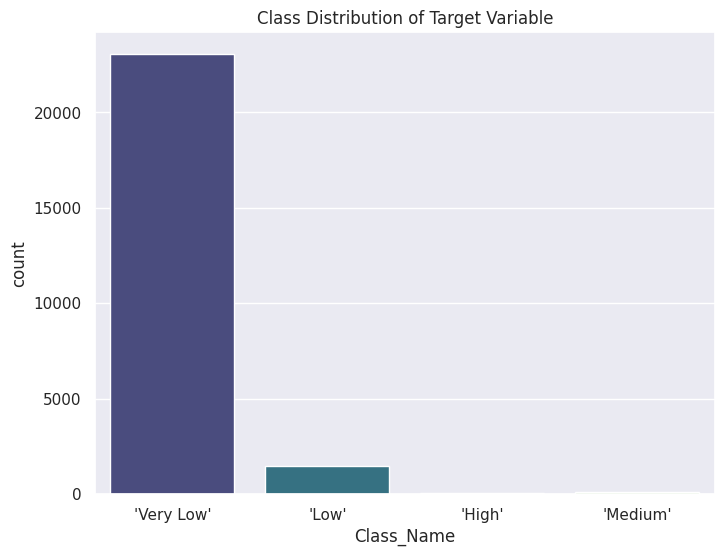

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class_Name', data=data, palette='viridis')
plt.title('Class Distribution of Target Variable')
plt.show()

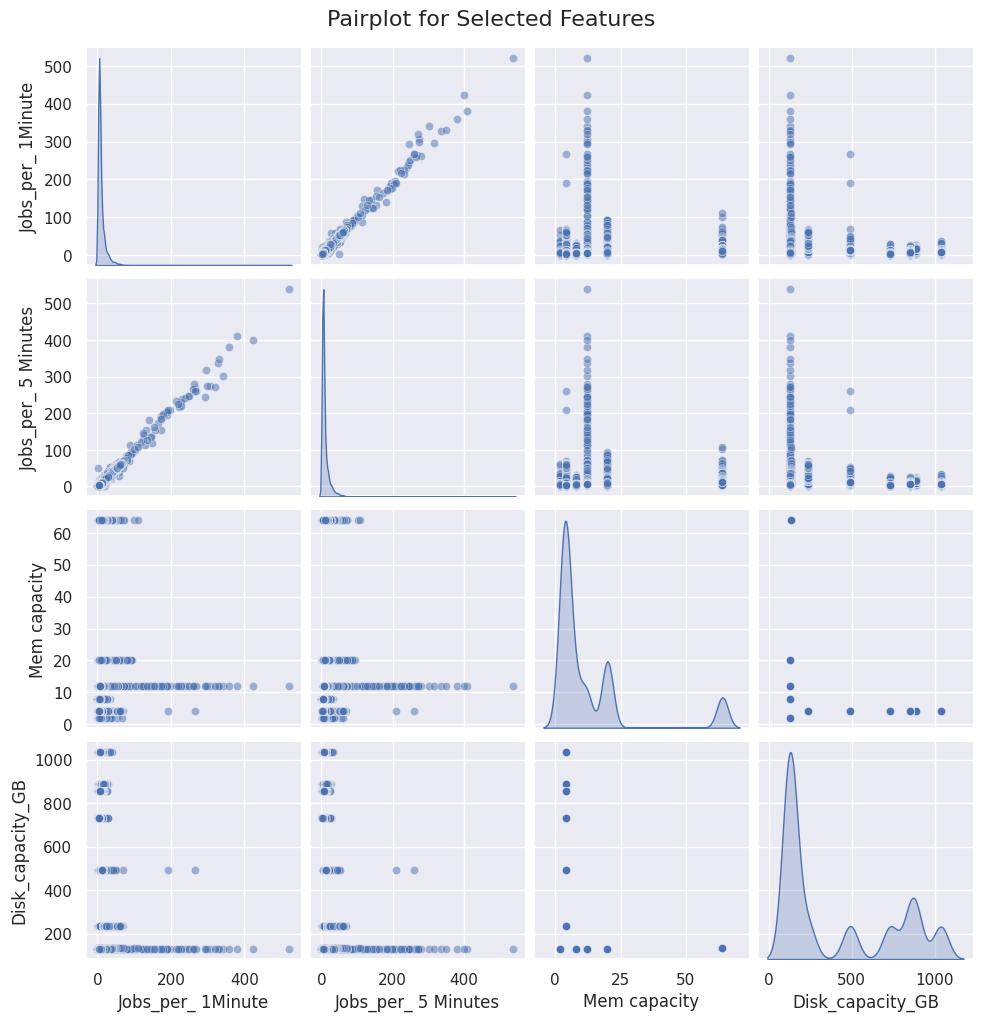

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style and context for a more refined appearance
sns.set_style("darkgrid")
sns.set_context("notebook")

selected_features = ['Jobs_per_ 1Minute', 'Jobs_per_ 5 Minutes', 'Mem capacity', 'Disk_capacity_GB']

sns.pairplot(
    data[selected_features], 
    height=2.5,                # Size of each subplot
    diag_kind='kde',           # Diagonal plots are Kernel Density Estimation (KDE) plots
    markers='o',               # Change the markers to circles
    plot_kws={'alpha': 0.5}    # Adjust transparency of scatter plots
)

plt.suptitle("Pairplot for Selected Features", size=16, y=1.02)
plt.savefig("plot.png")
plt.show()

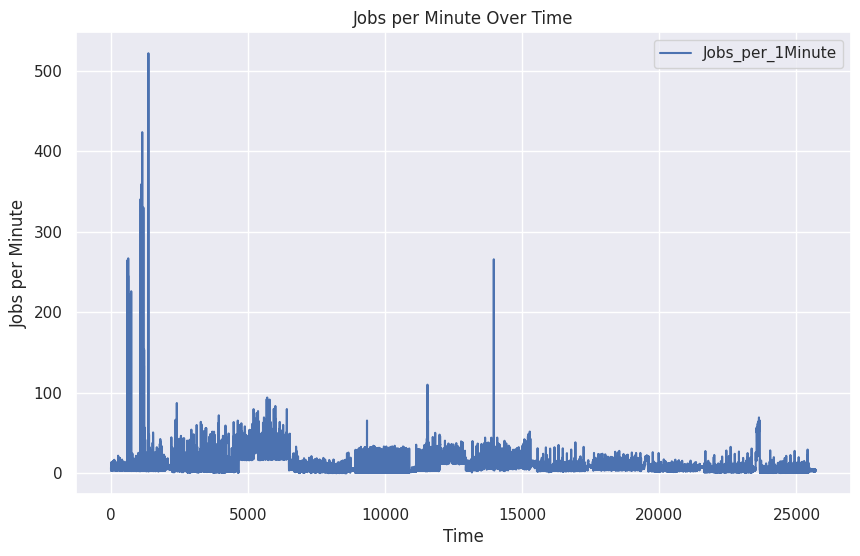

In [19]:
# Plot jobs per minute over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Jobs_per_ 1Minute'], label='Jobs_per_1Minute')
plt.xlabel('Time')
plt.ylabel('Jobs per Minute')
plt.title('Jobs per Minute Over Time')
plt.legend()
plt.show()

In [20]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Decompose the time series (example: Jobs_per_1Minute)
# decomposition = seasonal_decompose(data['Jobs_per_ 1Minute'], model='additive', period=60)
# decomposition.plot()
# plt.savefig("pattern.png")
# plt.show()

### Step 5: Preprocess the Data

In [21]:
len(numerical_cols)

9

In [22]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.describe()

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps
count,2.466900e+04,2.466900e+04,2.466900e+04,2.466900e+04,2.466900e+04,2.466900e+04,2.466900e+04,2.466900e+04,2.466900e+04
mean,9.677829e-17,-2.419457e-17,-1.324941e-16,2.131427e-17,-4.608490e-18,-2.154469e-16,1.111798e-16,-6.941538e-17,3.110731e-17
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-6.938939e-01,-6.565072e-01,-5.397916e-01,-6.451177e-01,-8.188622e-01,-1.154988e+00,-1.001907e+00,-4.315554e-01,-4.078410e-01
25%,-4.310187e-01,-4.098831e-01,-4.791090e-01,-5.235594e-01,-8.188622e-01,-5.860390e-01,-1.001907e+00,-4.215377e-01,-3.948824e-01
50%,-2.557227e-01,-2.704035e-01,-2.794371e-01,-5.235594e-01,-8.061532e-01,-5.860390e-01,9.980966e-01,-4.101239e-01,-3.636520e-01
75%,9.480043e-02,6.130584e-02,9.140131e-02,4.489067e-01,9.382588e-01,5.518591e-01,9.980966e-01,-2.714945e-01,-1.223398e-01
max,3.524661e+01,3.630970e+01,3.514881e+01,3.123189e+00,1.825113e+00,2.827655e+00,9.980966e-01,5.481360e+00,4.574868e+00


In [23]:
encoder = LabelEncoder()
data['Class_Name'] = encoder.fit_transform(data['Class_Name'])

In [24]:
data.head()

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,-0.211933,-0.145790,-0.023956,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3
1,-0.446028,-0.327675,-0.152598,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3
2,-0.456012,-0.320208,-0.151396,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3
3,-0.387160,-0.295271,-0.145321,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3
4,-0.452914,-0.307123,-0.145922,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3


In [25]:
data.head()

,Jobs_per_ 1Minute,Jobs_per_ 5 Minutes,Jobs_per_ 15Minutes,Mem capacity,Disk_capacity_GB,Num_of_CPU_Cores,CPU_speed_per_Core,Avg_Recieve_Kbps,Avg_Transmit_Kbps,Class_Name
0,-0.211933,-0.145790,-0.023956,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3
1,-0.446028,-0.327675,-0.152598,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3
2,-0.456012,-0.320208,-0.151396,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3
3,-0.387160,-0.295271,-0.145321,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3
4,-0.452914,-0.307123,-0.145922,-0.037326,-0.818862,-0.01709,-1.001907,-0.420505,-0.397775,3


### Step 6: Split the data

In [26]:
X = data.drop('Class_Name', axis=1)  
y = data['Class_Name'] 

In [27]:
print(X.size)
print(y.size)

222021
24669


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")

Data split into training and testing sets.


In [29]:
y_test.size

4934

### Step 7: Model Training and Evaluate (class weight method)

##### Random Forest

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score (accuracy): 0.9616523350472331
Average Training Accuracy (Stratified KFold): 0.9986622905504421
Average Test Accuracy (Stratified KFold): 0.9616523350472331
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.71      0.67      0.69       293
           2       0.22      0.09      0.13        22
           3       0.98      0.99      0.98      4611

    accuracy                           0.96      4933
   macro avg       0.65      0.69      0.66      4933
weighted avg       0.96      0.96      0.96      4933

Confusion Matrix (Test Data):
[[   7    0    0    0]
 [   0  197    6   90]
 [   3   14    2    3]
 [   0   65    1 4545]]


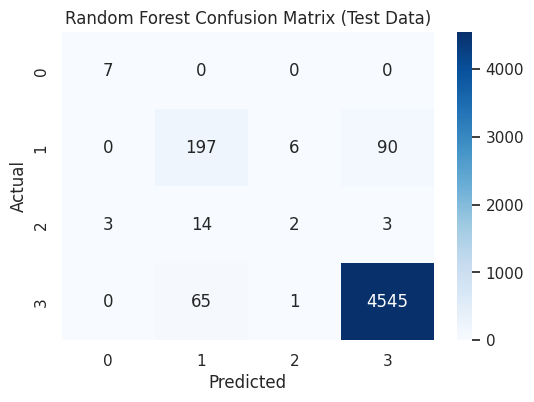

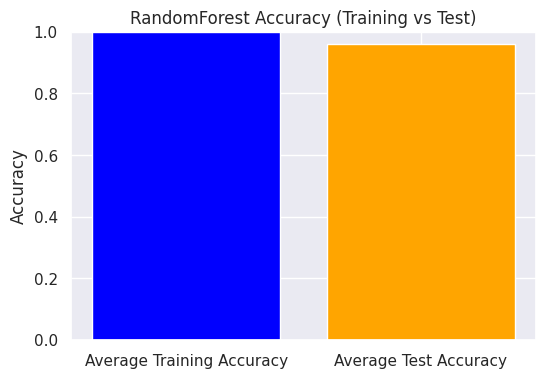

In [30]:
X = X.values if isinstance(X, pd.DataFrame) else X
y = y.values if isinstance(y, pd.Series) else y

rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_accuracies = []
test_accuracies = []

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score (accuracy): {best_score}")

best_rf_model = grid_search.best_estimator_

train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    best_rf_model.fit(X_train_fold, y_train_fold)
    
    rf_train_pred_fold = best_rf_model.predict(X_train_fold)
    rf_test_pred_fold = best_rf_model.predict(X_test_fold)
    
    train_accuracies.append(accuracy_score(y_train_fold, rf_train_pred_fold))
    test_accuracies.append(accuracy_score(y_test_fold, rf_test_pred_fold))

avg_train_acc = np.mean(train_accuracies)
avg_test_acc = np.mean(test_accuracies)

print(f"Average Training Accuracy (Stratified KFold): {avg_train_acc}")
print(f"Average Test Accuracy (Stratified KFold): {avg_test_acc}")

print("Classification Report (Test Data):")
print(classification_report(y_test_fold, rf_test_pred_fold))

print("Confusion Matrix (Test Data):")
rf_cm = confusion_matrix(y_test_fold, rf_test_pred_fold)
print(rf_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Diagrams/rf_cm.png")
plt.show()

accuracies = [avg_train_acc, avg_test_acc]
labels = ['Average Training Accuracy', 'Average Test Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  
plt.ylabel('Accuracy')
plt.title('RandomForest Accuracy (Training vs Test)')
plt.grid(True)
plt.savefig("Diagrams/rf_accuracy.png")
plt.show()

##### SVC

Best parameters found: {'C': 0.1, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
Best cross-validation score (accuracy): 0.9349791872625406
Average Training Accuracy (Stratified KFold): 0.9365296764003878
Average Test Accuracy (Stratified KFold): 0.9349791872625406
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.51      0.54      0.53       293
           2       0.12      0.50      0.19        22
           3       0.98      0.96      0.97      4611

    accuracy                           0.94      4933
   macro avg       0.52      0.75      0.58      4933
weighted avg       0.95      0.94      0.94      4933

Confusion Matrix (Test Data):
[[   7    0    0    0]
 [   2  159   62   70]
 [   5    4   11    2]
 [   1  147   20 4443]]


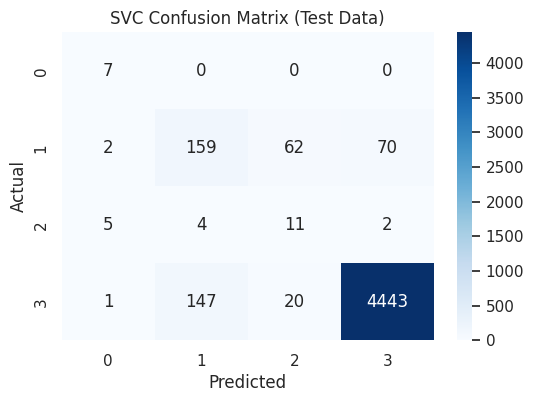

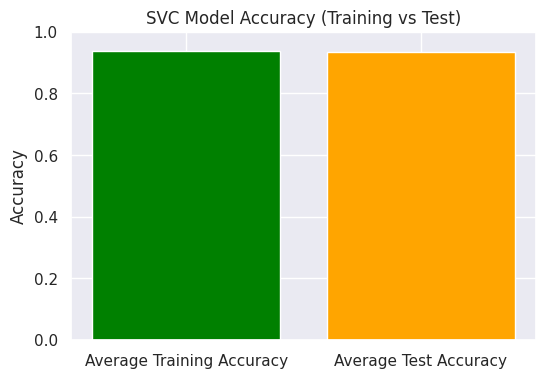

In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = X.values if isinstance(X, pd.DataFrame) else X
y = y.values if isinstance(y, pd.Series) else y

svc_model = SVC(class_weight="balanced", random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 5]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svc_train_accuracies = []
svc_test_accuracies = []

grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score (accuracy): {best_score}")

best_svc_model = grid_search.best_estimator_

svc_train_accuracies = []
svc_test_accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    best_svc_model.fit(X_train_fold, y_train_fold)
    
    svc_train_pred_fold = best_svc_model.predict(X_train_fold)
    svc_test_pred_fold = best_svc_model.predict(X_test_fold)
    
    svc_train_accuracies.append(accuracy_score(y_train_fold, svc_train_pred_fold))
    svc_test_accuracies.append(accuracy_score(y_test_fold, svc_test_pred_fold))

svc_avg_train_acc = np.mean(svc_train_accuracies)
svc_avg_test_acc = np.mean(svc_test_accuracies)

print(f"Average Training Accuracy (Stratified KFold): {svc_avg_train_acc}")
print(f"Average Test Accuracy (Stratified KFold): {svc_avg_test_acc}")

print("Classification Report (Test Data):")
print(classification_report(y_test_fold, svc_test_pred_fold))

print("Confusion Matrix (Test Data):")
svc_cm = confusion_matrix(y_test_fold, svc_test_pred_fold)
print(svc_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVC Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Diagrams/svc_cm.png")
plt.show()

svc_accuracies = [svc_avg_train_acc, svc_avg_test_acc]
svc_labels = ['Average Training Accuracy', 'Average Test Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(svc_labels, svc_accuracies, color=['green', 'orange'])
plt.ylim(0, 1)  
plt.ylabel('Accuracy')
plt.title('SVC Model Accuracy (Training vs Test)')
plt.grid(True)
plt.savefig("Diagrams/svc_accuracy.png")
plt.show()

Best Hyperparameters found by GridSearchCV:
{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Average Training Accuracy (Stratified KFold): 0.948498125086459
Average Test Accuracy (Stratified KFold): 0.9486401197201808
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.59      0.73      0.65       293
           2       0.21      0.14      0.17        22
           3       0.98      0.97      0.98      4611

    accuracy                           0.95      4933
   macro avg       0.45      0.46      0.45      4933
weighted avg       0.95      0.95      0.95      4933

Confusion Matrix (Test Data):
[[   0    1    6    0]
 [   0  213    3   77]
 [   0   18    3    1]
 [   0  130    2 4479]]


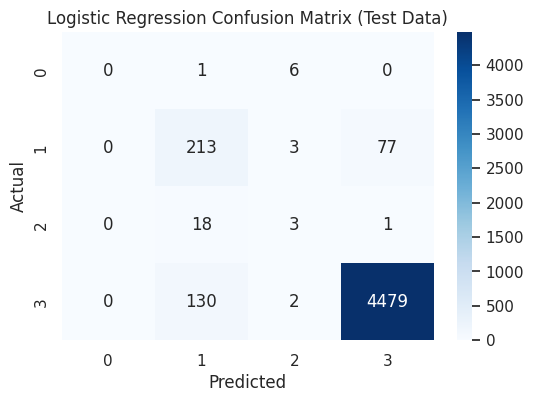

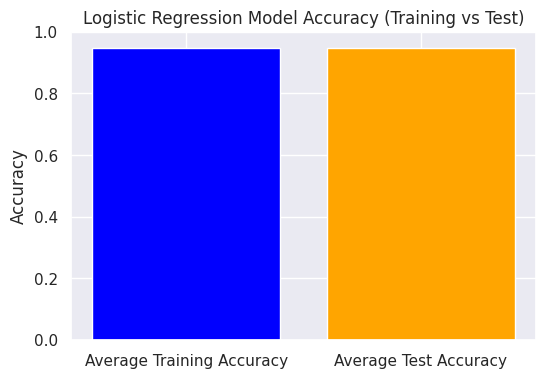

In [33]:
X = X.values if isinstance(X, pd.DataFrame) else X
y = y.values if isinstance(y, pd.Series) else y

lr_model = LogisticRegression(class_weight="balanced", random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_train_accuracies = []
lr_test_accuracies = []

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=kf, scoring='accuracy')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters found by GridSearchCV:")
print(best_params)

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    best_model.fit(X_train_fold, y_train_fold)
    
    lr_train_pred_fold = best_model.predict(X_train_fold)
    lr_test_pred_fold = best_model.predict(X_test_fold)
    
    lr_train_accuracies.append(accuracy_score(y_train_fold, lr_train_pred_fold))
    lr_test_accuracies.append(accuracy_score(y_test_fold, lr_test_pred_fold))

lr_avg_train_acc = np.mean(lr_train_accuracies)
lr_avg_test_acc = np.mean(lr_test_accuracies)

print(f"Average Training Accuracy (Stratified KFold): {lr_avg_train_acc}")
print(f"Average Test Accuracy (Stratified KFold): {lr_avg_test_acc}")

print("Classification Report (Test Data):")
print(classification_report(y_test_fold, lr_test_pred_fold))

print("Confusion Matrix (Test Data):")
lr_cm = confusion_matrix(y_test_fold, lr_test_pred_fold)
print(lr_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Diagrams/lr_cm.png")
plt.show()

lr_accuracies = [lr_avg_train_acc, lr_avg_test_acc]
lr_labels = ['Average Training Accuracy', 'Average Test Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(lr_labels, lr_accuracies, color=['blue', 'orange'])  
plt.ylim(0, 1)  
plt.ylabel('Accuracy')
plt.title('Logistic Regression Model Accuracy (Training vs Test)')
plt.grid(True)
plt.savefig("Diagrams/lf_accuracy.png")
plt.show()

Best Hyperparameters found by GridSearchCV:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Average Training Accuracy (Stratified KFold): 0.9709554562073951
Average Test Accuracy (Stratified KFold): 0.9648142014218744
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       0.76      0.67      0.71       293
           2       0.00      0.00      0.00        22
           3       0.98      0.99      0.98      4611

    accuracy                           0.97      4933
   macro avg       0.58      0.66      0.61      4933
weighted avg       0.96      0.97      0.96      4933

Confusion Matrix (Test Data):
[[   7    0    0    0]
 [   0  196    3   94]
 [   5   14    0    3]
 [   0   47    0 4564]]


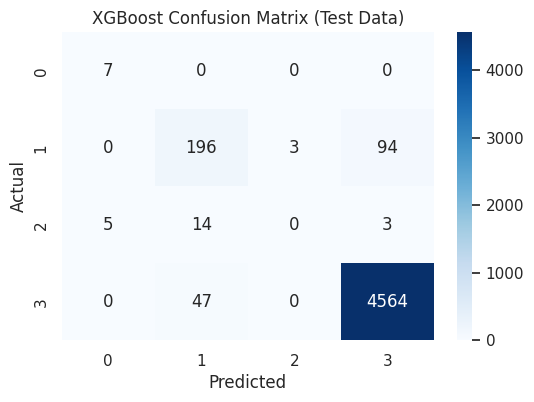

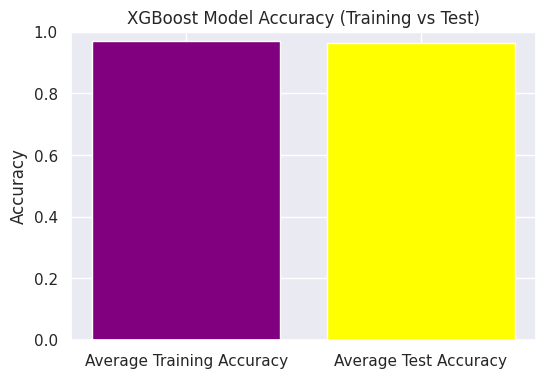

In [34]:
X = X.values if isinstance(X, pd.DataFrame) else X
y = y.values if isinstance(y, pd.Series) else y

xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_train_accuracies = []
xgb_test_accuracies = []

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='accuracy')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters found by GridSearchCV:")
print(best_params)

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    best_model.fit(X_train_fold, y_train_fold)
    
    xgb_train_pred_fold = best_model.predict(X_train_fold)
    xgb_test_pred_fold = best_model.predict(X_test_fold)
    
    xgb_train_accuracies.append(accuracy_score(y_train_fold, xgb_train_pred_fold))
    xgb_test_accuracies.append(accuracy_score(y_test_fold, xgb_test_pred_fold))

xgb_avg_train_acc = np.mean(xgb_train_accuracies)
xgb_avg_test_acc = np.mean(xgb_test_accuracies)

print(f"Average Training Accuracy (Stratified KFold): {xgb_avg_train_acc}")
print(f"Average Test Accuracy (Stratified KFold): {xgb_avg_test_acc}")

print("Classification Report (Test Data):")
print(classification_report(y_test_fold, xgb_test_pred_fold))

print("Confusion Matrix (Test Data):")
xgb_cm = confusion_matrix(y_test_fold, xgb_test_pred_fold)
print(xgb_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Diagrams/xgb_cm.png")
plt.show()

xgb_accuracies = [xgb_avg_train_acc, xgb_avg_test_acc]
xgb_labels = ['Average Training Accuracy', 'Average Test Accuracy']

plt.figure(figsize=(6, 4))
plt.bar(xgb_labels, xgb_accuracies, color=['purple', 'yellow'])
plt.ylim(0, 1)  
plt.ylabel('Accuracy')
plt.title('XGBoost Model Accuracy (Training vs Test)')
plt.grid(True)
plt.savefig("Diagrams/xgb_accuracy.png")
plt.show()

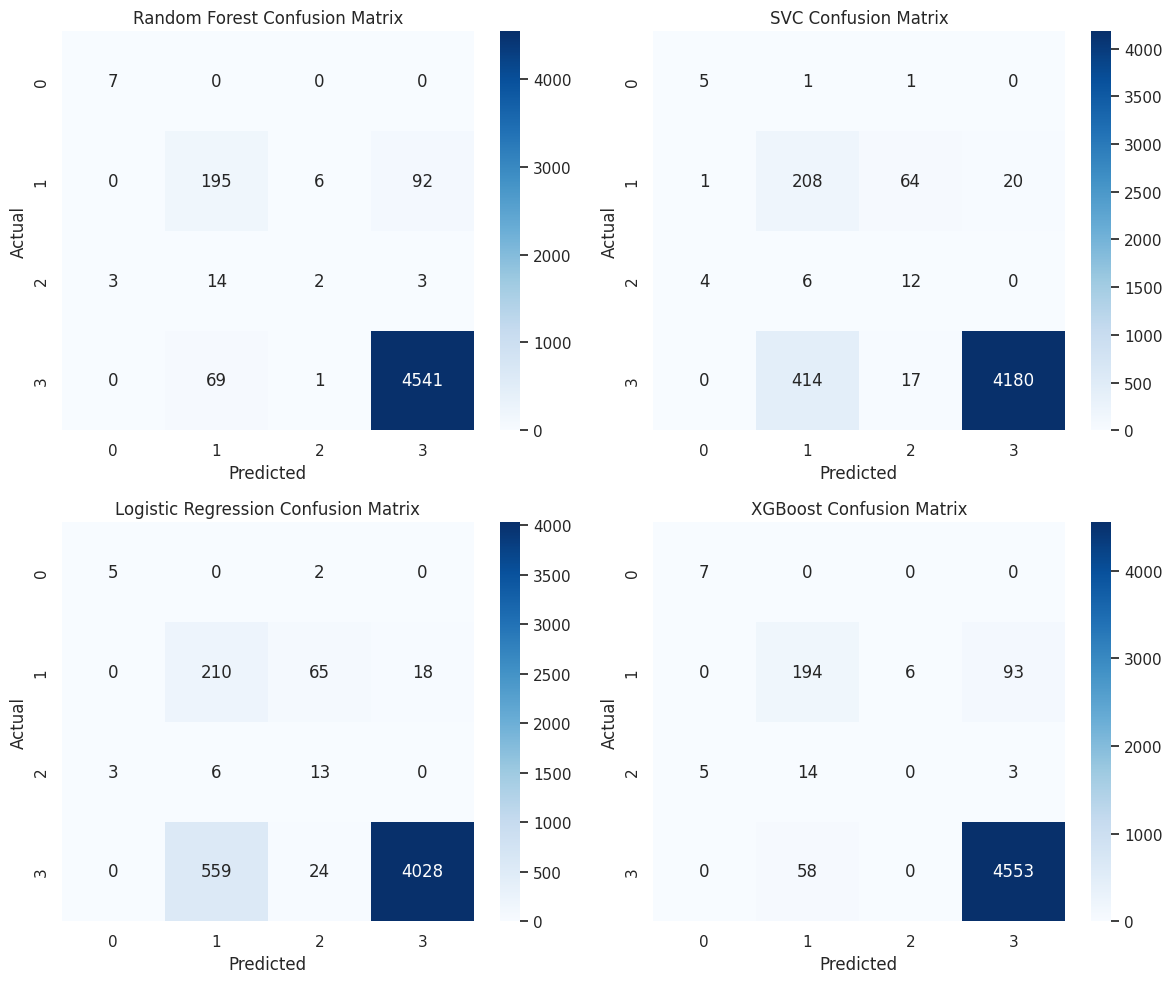

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each confusion matrix with heatmap
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Random Forest Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('SVC Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Logistic Regression Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('XGBoost Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig("Diagrams/all_cm.png")
plt.show()


### Step 7: Using SMOTE Method

In [47]:
print(X_train.size)
print(y_train.size)

177615
19735


In [51]:
X1=X
y1=y

#### use X an y 

In [63]:
smote = SMOTE(sampling_strategy='auto',random_state=42)  
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)  

X_train_resampled, y_train_resampled = smote.fit_resample(X1, y1)

X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_resampled, y_train_resampled)

print("New class distribution in the training data:")
print(Counter(y_train_balanced))

New class distribution in the training data:
Counter({np.int64(0): 23055, np.int64(1): 23055, np.int64(2): 23055, np.int64(3): 23055})


#### apply model

In [68]:
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced ,cv=5, scoring='accuracy')
print(f"RandomForest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")
rf_model.fit(X_train_balanced, y_train_balanced)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classification Report (Loaded):")
print(classification_report(y_test, rf_predictions))

RandomForest Cross-Validation Accuracy: 0.9390 ± 0.0665
Random Forest Classification Report (Loaded):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.98      0.97      0.98       297
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00      4606

    accuracy                           1.00      4934
   macro avg       1.00      0.99      0.99      4934
weighted avg       1.00      1.00      1.00      4934



# save and load models 

In [49]:
smote = SMOTE(sampling_strategy='auto',random_state=42)  
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)  

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_resampled, y_train_resampled)

print("New class distribution in the training data:")
print(Counter(y_train_balanced))

New class distribution in the training data:
Counter({0: 18449, 1: 18449, 2: 18449, 3: 18449})


In [43]:
#Initialize models
svc_model = SVC(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

svc_cv_scores = cross_val_score(svc_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
lr_cv_scores = cross_val_score(lr_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')

print(f"SVC Cross-Validation Accuracy: {svc_cv_scores.mean():.4f} ± {svc_cv_scores.std():.4f}")
print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")
print(f"RandomForest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")
print(f"LogisticRegression Cross-Validation Accuracy: {lr_cv_scores.mean():.4f} ± {lr_cv_scores.std():.4f}")

SVC Cross-Validation Accuracy: 0.8135 ± 0.0045
XGBoost Cross-Validation Accuracy: 0.9735 ± 0.0027
RandomForest Cross-Validation Accuracy: 0.9843 ± 0.0031
LogisticRegression Cross-Validation Accuracy: 0.8229 ± 0.0041


#### Model Training and evaluate

In [42]:
svc_model.fit(X_train_balanced, y_train_balanced)
xgb_model.fit(X_train_balanced, y_train_balanced)
rf_model.fit(X_train_balanced, y_train_balanced)
lr_model.fit(X_train_balanced, y_train_balanced)

svc_predictions = svc_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

joblib.dump(svc_model, 'svc_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')

print("Models saved successfully!")

Models saved successfully!


#### load saved models

In [43]:
svc_model_loaded = joblib.load('svc_model.pkl')
xgb_model_loaded = joblib.load('xgb_model.pkl')
rf_model_loaded = joblib.load('rf_model.pkl')
lr_model_loaded = joblib.load('lr_model.pkl')

svc_predictions_loaded = svc_model_loaded.predict(X_test)
xgb_predictions_loaded = xgb_model_loaded.predict(X_test)
rf_predictions_loaded = rf_model_loaded.predict(X_test)
lr_predictions_loaded = lr_model_loaded.predict(X_test)

print("SVC Classification Report (Loaded):")
print(classification_report(y_test, svc_predictions_loaded))

print("XGBoost Classification Report (Loaded):")
print(classification_report(y_test, xgb_predictions_loaded))

print("Random Forest Classification Report (Loaded):")
print(classification_report(y_test, rf_predictions_loaded))

print("Logistic Regression Classification Report (Loaded):")
print(classification_report(y_test, lr_predictions_loaded))

SVC Classification Report (Loaded):
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.29      0.55      0.38       297
           2       0.11      0.73      0.19        22
           3       0.99      0.91      0.95      4606

    accuracy                           0.89      4934
   macro avg       0.54      0.71      0.56      4934
weighted avg       0.94      0.89      0.91      4934

XGBoost Classification Report (Loaded):
              precision    recall  f1-score   support

           0       0.71      0.56      0.62         9
           1       0.51      0.78      0.62       297
           2       0.24      0.41      0.31        22
           3       0.99      0.95      0.97      4606

    accuracy                           0.94      4934
   macro avg       0.61      0.68      0.63      4934
weighted avg       0.96      0.94      0.95      4934

Random Forest Classification Report (Loaded):
        

#### confusion_matrixes

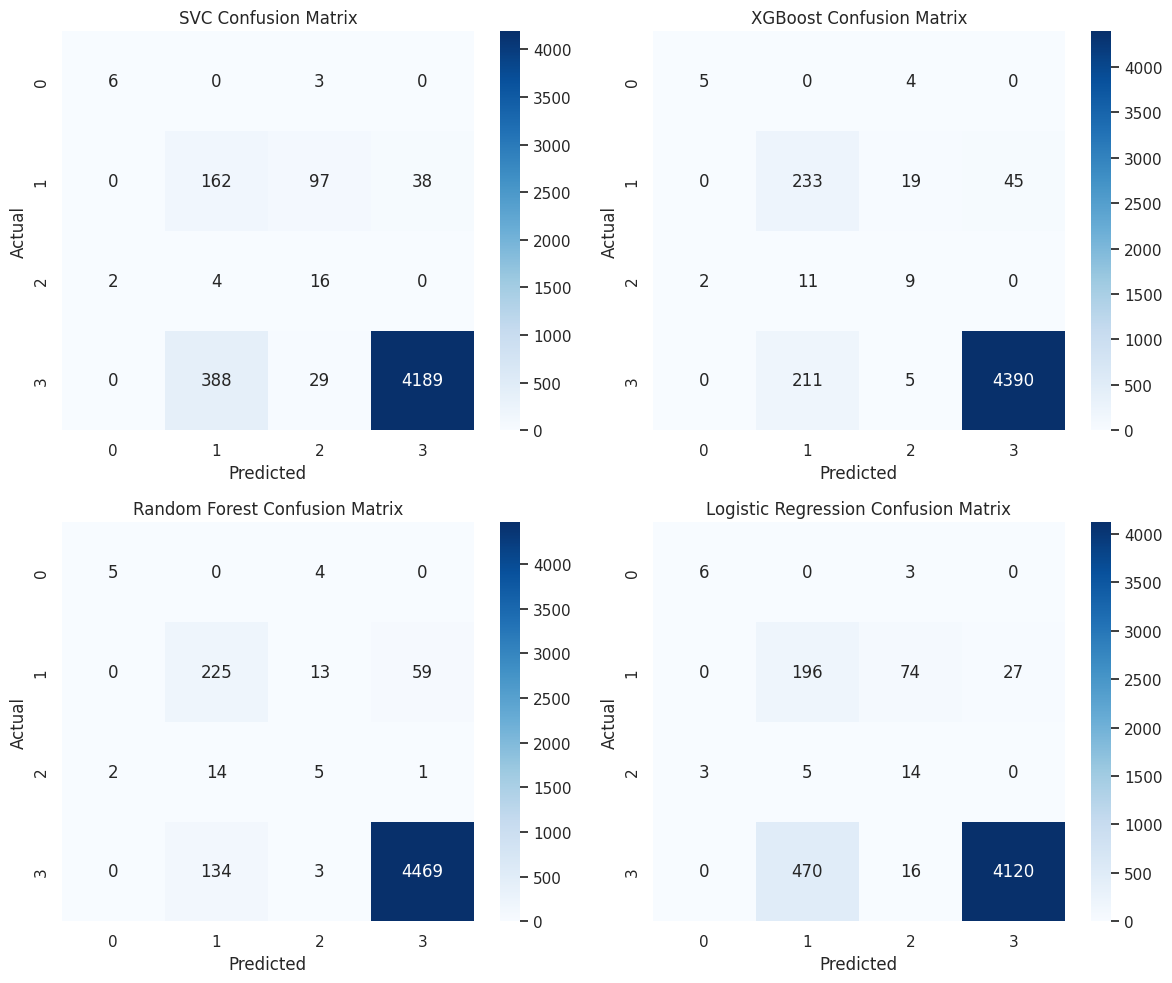

In [45]:

svc_cm = confusion_matrix(y_test, svc_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
lr_cm = confusion_matrix(y_test, lr_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# SVC Confusion Matrix
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues',ax=axes[0, 0])
axes[0, 0].set_title('SVC Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# XGBoost Confusion Matrix
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues',ax=axes[0, 1])
axes[0, 1].set_title('XGBoost Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',ax=axes[1, 0])
axes[1, 0].set_title('Random Forest Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Logistic Regression Confusion Matrix
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',ax=axes[1, 1])
axes[1, 1].set_title('Logistic Regression Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()